# Project Topic Proposal

In [1]:
import requests
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd

In [2]:
requests.get('http://nhl.cz//robots.txt')

<Response [200]>

In [3]:
print(requests.get('http://nhl.cz//robots.txt').text)

### Getting the data

In [4]:
def getSoup(link):
    sleep(0.1)
    r = requests.get(link)
    return BeautifulSoup(r.text,'lxml')

In [5]:
#just showing we can get the data - 
#downloading just some seasons and just one team for now
years = ['2014','2015','2016','2017','2018']
seasons = ['2014-2015','2015-2016','2016-2017','2017-2018','2018-2019']
team = "montreal-canadiens"
montreal_points = []

In [6]:
for year in years:
    x = getSoup(f'https://nhl.cz/sezona/table?table-filter-season={year}')
    one_team = x.find("td", {"data-sort-value" : team}).parent
    points_this_season = one_team.find("td", {"class" : "sorting-by"})
    montreal_points.append(int(points_this_season.text.strip()))

In [7]:
df = pd.DataFrame(montreal_points,index=seasons)
df.columns = [team]
df

,montreal-canadiens
2014-2015,110
2015-2016,82
2016-2017,103
2017-2018,71
2018-2019,96


<AxesSubplot:>

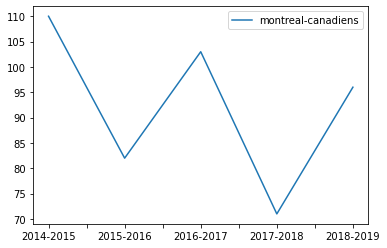

In [8]:
df.plot()